In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # importing neccesary ,libraries

In [2]:
Data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
Data.head() #Loading the dataset

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
Data.shape

(4177, 9)

In [4]:
Data.info() #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
Data["Sex"].unique() #checking the unique values of object data type

array(['M', 'F', 'I'], dtype=object)

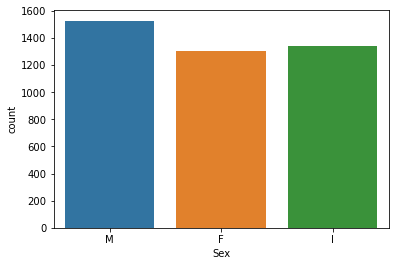

In [6]:
sns.countplot(x=Data["Sex"])
plt.show() #visualing the object data type 

In [7]:
Data["Sex"]=Data["Sex"].replace({'M':0,'F':1,'I':2})
Data["Sex"] # replacing the object data type as int

0       0
1       0
2       1
3       0
4       2
       ..
4172    1
4173    0
4174    0
4175    1
4176    0
Name: Sex, Length: 4177, dtype: int64

In [8]:
Data.isnull().sum() #checking the null values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
#There is no null values in the data, hence we are good to go

In [10]:
Data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
#The difference between mean and std is quite high in almost all the columns
# For Viscera weight there is a difference between minimum and maximum values
# Data implies skewness

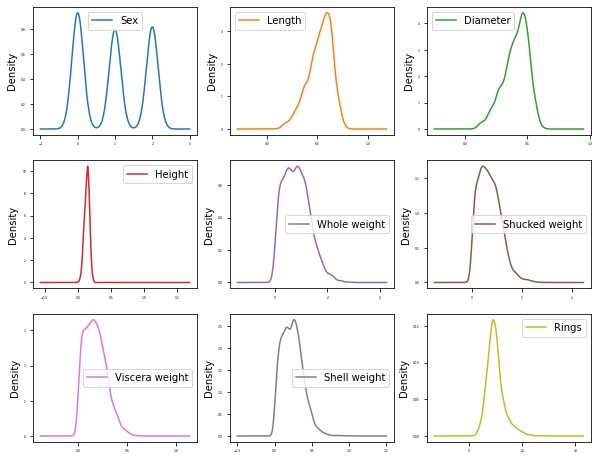

In [12]:
Data.plot(kind='kde',subplots=True,layout=(3,3),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show()

In [13]:
# The graph shows there is a skewness in all the columns

In [14]:
X=Data.drop("Rings",axis=1) # removing the target variable

In [15]:
Y= Data["Rings"]

In [16]:
Y.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

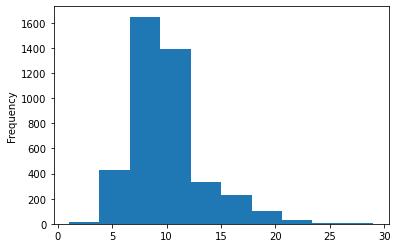

In [17]:
Y.plot.hist()
plt.show() #Visualizing the target variable

In [18]:
# It can be seen majority of the data lies between 4 to 18 in the graph

In [19]:
X.skew().sort_values(ascending=False) #Checking data skewness

Height            3.128817
Shucked weight    0.719098
Shell weight      0.620927
Viscera weight    0.591852
Whole weight      0.530959
Sex               0.083056
Diameter         -0.609198
Length           -0.639873
dtype: float64

In [20]:
from sklearn.preprocessing import power_transform

In [21]:
X_transform=power_transform(X)

In [22]:
pd.DataFrame(X_transform,columns=X.columns).skew().sort_values(ascending=False) # transforming the data to reduce skewness

Viscera weight    0.039780
Shucked weight    0.027351
Shell weight      0.023390
Whole weight     -0.003980
Diameter         -0.065977
Length           -0.066669
Sex              -0.095804
Height           -0.115483
dtype: float64

In [23]:
X= pd.DataFrame(X_transform, columns=X.columns) # New DataFrame after transformation

In [24]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-1.206427,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809
1,-1.206427,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420
2,0.186202,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262
3,-1.206427,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931
4,1.192291,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528
...,...,...,...,...,...,...,...,...
4172,0.186202,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008
4173,-1.206427,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215
4174,-1.206427,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398
4175,0.186202,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145


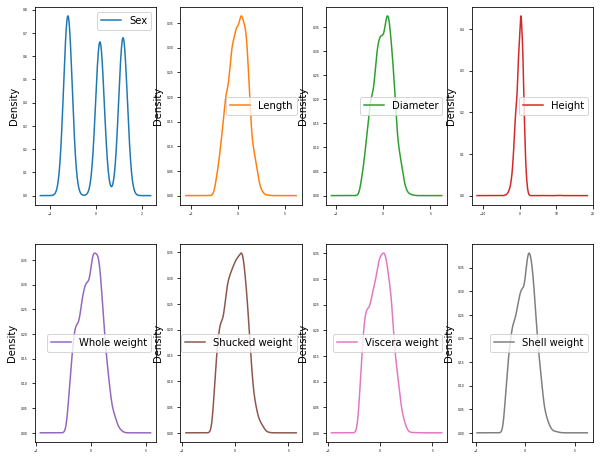

In [25]:
X.plot(kind='kde',subplots=True,layout=(2,4),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show()

In [26]:
X.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
dtype: int64

In [27]:
X.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Sex,1.000000,-0.415246,-0.422934,-0.415509,-0.449358,-0.433144,-0.446218,-0.438035
Length,-0.415246,1.000000,0.982954,0.874099,0.972757,0.956482,0.953238,0.946681
Diameter,-0.422934,0.982954,1.000000,0.880744,0.971244,0.949864,0.948235,0.953241
Height,-0.415509,0.874099,0.880744,1.000000,0.893844,0.857753,0.875732,0.894305
Whole weight,-0.449358,0.972757,0.971244,0.893844,1.000000,0.977466,0.974887,0.968830
Shucked weight,-0.433144,0.956482,0.949864,0.857753,0.977466,1.000000,0.948587,0.917084
Viscera weight,-0.446218,0.953238,0.948235,0.875732,0.974887,0.948587,1.000000,0.935002
Shell weight,-0.438035,0.946681,0.953241,0.894305,0.968830,0.917084,0.935002,1.000000


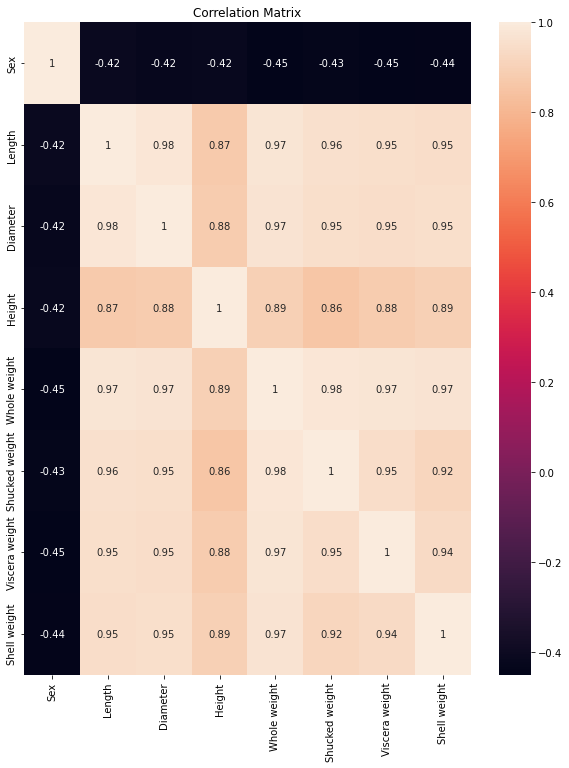

In [28]:
corr_mat=X.corr()
plt.figure(figsize=[10,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show() #Checking correlation

In [29]:
# From the above heatmap it can be said that all the features are highly correlated apart from Height.
# Checking the same via VIF scores

In [30]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Sex,1.272959
1,Length,37.387145
2,Diameter,35.737520
3,Height,5.400235
4,Whole weight,142.202315
5,Shucked weight,37.285379
6,Viscera weight,22.827163
7,Shell weight,29.488932


### Therefore from the above observation it can be concluded that both in Heat map and VIF, whole weight has the highest multicollinearity problem

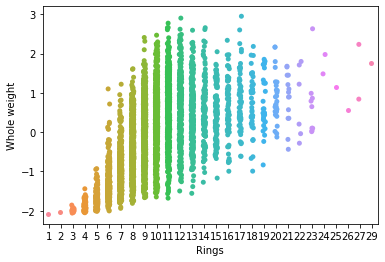

In [31]:
sns.stripplot(Y,X["Whole weight"])
plt.show()

In [32]:
#Whole weight also does not show any specific relationship with our target variable
#Therefore we can drop whole weight from X

In [33]:
X_new=X.drop("Whole weight",axis=1)
X_new

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight
0,-1.206427,-0.685502,-0.549860,-1.124512,-0.540989,-0.693283,-0.587809
1,-1.206427,-1.396344,-1.387333,-1.264396,-1.311662,-1.332953,-1.332420
2,0.186202,-0.070774,0.008537,-0.064823,-0.366116,-0.255135,-0.098262
3,-1.206427,-0.797286,-0.549860,-0.320227,-0.591672,-0.547782,-0.544931
4,1.192291,-1.513796,-1.459659,-1.549424,-1.380201,-1.451759,-1.485528
...,...,...,...,...,...,...,...
4172,0.186202,0.249836,0.345636,0.666117,0.194158,0.639623,0.193008
4173,-1.206427,0.492813,0.230611,-0.064823,0.495450,0.433568,0.275215
4174,-1.206427,0.593366,0.645191,1.565082,0.838137,1.015607,0.598398
4175,0.186202,0.853375,0.769928,0.307083,0.858739,0.815184,0.519145


In [34]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_new.columns
vif_data["VIF"] = [variance_inflation_factor(X_new.values, i)
                          for i in range(len(X_new.columns))]

vif_data # checking the VIF score after dropping highest multicollinear feature

,feature,VIF
0,Sex,1.270238
1,Length,37.318217
2,Diameter,35.657418
3,Height,5.388662
4,Shucked weight,14.528788
5,Viscera weight,15.155475
6,Shell weight,13.877148


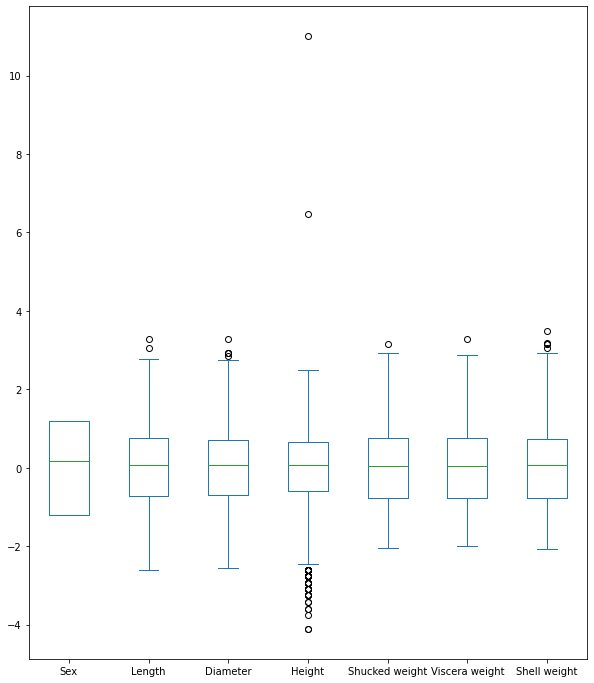

In [35]:
X_new.plot(kind='box',figsize=(10,12),layout=(4,3))
plt.show() #checking for oultiers

In [36]:
#Almost all columns have outliers, the highest being in height

In [37]:
from scipy.stats import zscore

In [38]:
(np.abs(zscore(X_new)<3)).all()

Sex                True
Length            False
Diameter          False
Height            False
Shucked weight    False
Viscera weight    False
Shell weight      False
dtype: bool

In [39]:
# these are the index positions where outlier is present
index = np.where(np.abs(zscore(X_new))>3)
index

(array([ 163,  166,  236,  237,  238,  306,  694,  719,  720,  891, 1174,
        1209, 1257, 1417, 1428, 1428, 1763, 1987, 2051, 2108, 2161, 2169,
        2171, 2172, 2334, 2381, 2711, 3190, 3902, 3996], dtype=int64),
 array([6, 6, 3, 3, 3, 3, 3, 3, 3, 6, 3, 4, 3, 3, 1, 2, 5, 3, 3, 6, 6, 3,
        3, 3, 1, 3, 3, 3, 3, 3], dtype=int64))

In [40]:
# assigning a variable to the values having less than 3 zscore
new_df = X_new[(np.abs(zscore(X_new))<3).all(axis=1)]
new_df

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight
0,-1.206427,-0.685502,-0.549860,-1.124512,-0.540989,-0.693283,-0.587809
1,-1.206427,-1.396344,-1.387333,-1.264396,-1.311662,-1.332953,-1.332420
2,0.186202,-0.070774,0.008537,-0.064823,-0.366116,-0.255135,-0.098262
3,-1.206427,-0.797286,-0.549860,-0.320227,-0.591672,-0.547782,-0.544931
4,1.192291,-1.513796,-1.459659,-1.549424,-1.380201,-1.451759,-1.485528
...,...,...,...,...,...,...,...
4172,0.186202,0.249836,0.345636,0.666117,0.194158,0.639623,0.193008
4173,-1.206427,0.492813,0.230611,-0.064823,0.495450,0.433568,0.275215
4174,-1.206427,0.593366,0.645191,1.565082,0.838137,1.015607,0.598398
4175,0.186202,0.853375,0.769928,0.307083,0.858739,0.815184,0.519145


In [41]:
Y_new=Y.drop(index[0],axis=0)
Y_new  #removing the outliers from target variables

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4148, dtype: int64

In [42]:
Data_Loss=(4177-4148)/4177*100
Data_Loss
# Checking the total data lost after removing the outliers

0.6942781900885803

In [43]:
Scalar=StandardScaler() #scaling the data

In [44]:
X_Scaled=Scalar.fit_transform(new_df)
X_Scaled

array([[-1.20311927, -0.69835403, -0.5606644 , ..., -0.54890674,
        -0.70244256, -0.59668551],
       [-1.20311927, -1.41898448, -1.40973513, ..., -1.32734099,
        -1.34850789, -1.35143619],
       [ 0.18973677, -0.07516127,  0.00546626, ..., -0.37227262,
        -0.25991412, -0.10047186],
       ...,
       [-1.20311927,  0.59812469,  0.65093696, ...,  0.84410857,
         1.02353364,  0.60567494],
       [ 0.18973677,  0.86171415,  0.77740142, ...,  0.86491805,
         0.82110665,  0.52534325],
       [-1.20311927,  1.85632696,  1.74700698, ...,  2.12236539,
         1.62522667,  1.68020147]])

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca=PCA()

In [47]:
pca=PCA(n_components=7)
new_data=pca.fit_transform(X_Scaled)
Principal_X=pd.DataFrame(new_data,columns=new_df.columns)

In [48]:
Principal_X

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight
0,-1.454496,1.534569,0.513967,-0.223358,-0.009968,0.114968,0.093397
1,-3.016901,1.878026,0.038215,-0.002857,0.019497,0.013722,-0.004612
2,-0.389623,-0.117116,-0.127756,-0.226869,0.076387,-0.152959,0.030666
3,-1.117998,1.477837,-0.219910,0.061805,-0.000296,0.019284,0.161873
4,-3.851121,-0.397788,0.188040,0.010022,-0.042764,0.065651,0.054155
...,...,...,...,...,...,...,...
4143,0.882510,-0.372851,-0.309594,0.260357,-0.180315,-0.256893,0.087182
4144,1.001463,1.010105,0.460167,0.016523,-0.052462,0.033281,-0.168657
4145,2.378635,0.739885,-0.692147,0.570609,0.018875,-0.122512,0.048711
4146,1.628682,-0.551250,0.461192,0.074998,-0.008963,-0.072478,-0.022569


# Linear Regression

In [49]:
LR=LinearRegression()

In [50]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(Principal_X,Y_new,test_size=0.20,random_state=i)
    LR.fit(X_train,y_train)
    pred_train=LR.predict(X_train)
    pred_test=LR.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- 52.13438554287717
/n
At random state 1 the testing accurancy is:- 52.066846011824154
/n
At random state 2 the testing accurancy is:- 51.65025983656846
/n
At random state 3 the testing accurancy is:- 53.130147603324176
/n
At random state 4 the testing accurancy is:- 50.51279444209106
/n
At random state 5 the testing accurancy is:- 53.91668530766902
/n
At random state 6 the testing accurancy is:- 50.23109528016927
/n
At random state 7 the testing accurancy is:- 46.78305575048353
/n
At random state 8 the testing accurancy is:- 52.7539522112892
/n
At random state 9 the testing accurancy is:- 47.88948079507542
/n
At random state 10 the testing accurancy is:- 52.24550870397104
/n
At random state 11 the testing accurancy is:- 53.36432129340521
/n
At random state 12 the testing accurancy is:- 48.440391512211335
/n
At random state 13 the testing accurancy is:- 53.15233820669156
/n
At random state 14 the testing accurancy is:- 50.28695788336417
/n
At 

In [51]:
#At random state 39,Linear Regression score is highest 56.9%

In [52]:
X_train,X_test,y_train,y_test=train_test_split(Principal_X,Y_new,test_size=0.20,random_state=39)
LR.fit(X_train,y_train)
pred_test=LR.predict(X_test)
pred_test 

array([10.36487075,  7.1445563 , 10.76600577,  8.24598771, 12.08653951,
        9.15910779,  8.09435464, 12.05692345,  8.75161298,  9.59316682,
       11.2087121 , 10.83253395,  6.26599681,  8.08734628,  8.17629636,
       15.92949559,  6.72131603,  8.63712572,  7.7830389 ,  9.84550433,
        8.47873409, 10.0963802 ,  9.40047109,  9.20554497, 14.39893107,
       11.70067869,  8.7267627 , 11.39475532,  8.73727528,  7.57604883,
        6.75977755,  7.79164002, 14.55342958, 11.71825398,  7.63617977,
       13.31174419, 10.26301748,  7.97129441,  8.50820347, 12.32766003,
        7.93748189,  6.85579778,  8.35751981,  9.61953483, 11.20058131,
        5.93057145, 16.07522608,  8.79264772,  7.50749716, 10.68102892,
        6.95081225, 12.88050775, 10.1992341 ,  8.98251352, 12.95861576,
       12.08235642, 12.03002556, 14.19194695,  8.8421313 , 10.40892217,
       11.24140104,  7.06202473,  9.60162452, 10.51570119,  9.86480863,
        7.76691854, 10.49342578,  6.54651907,  6.2816259 , 10.96

In [53]:
LR_Score=r2_score(y_test,pred_test)

In [54]:
LR_Score #checking test score via Linear Regression

0.5690100402243359

# Decision Tree

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
dt=DecisionTreeRegressor()

In [57]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(Principal_X,Y_new,test_size=0.20,random_state=i)
    dt.fit(X_train,y_train)
    pred_test=dt.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- 20.45085918522913
/n
At random state 1 the testing accurancy is:- -6.774070039315694
/n
At random state 2 the testing accurancy is:- -3.763484042845344
/n
At random state 3 the testing accurancy is:- 9.224545338200585
/n
At random state 4 the testing accurancy is:- 3.931671025917738
/n
At random state 5 the testing accurancy is:- 4.116094827316175
/n
At random state 6 the testing accurancy is:- -7.677936868813928
/n
At random state 7 the testing accurancy is:- 11.682553757481728
/n
At random state 8 the testing accurancy is:- 13.037823694309736
/n
At random state 9 the testing accurancy is:- 1.6395561965284022
/n
At random state 10 the testing accurancy is:- 22.20661272531973
/n
At random state 11 the testing accurancy is:- 13.833984911531916
/n
At random state 12 the testing accurancy is:- 4.728319592664398
/n
At random state 13 the testing accurancy is:- 18.634789162241272
/n
At random state 14 the testing accurancy is:- 14.90142060195847


# Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rf=RandomForestRegressor()

In [60]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(Principal_X,Y_new,test_size=0.20,random_state=i)
    rf.fit(X_train,y_train)
    pred_test=rf.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- 51.78584279256706
/n
At random state 1 the testing accurancy is:- 49.99436243012549
/n
At random state 2 the testing accurancy is:- 49.794967179490534
/n
At random state 3 the testing accurancy is:- 53.304074343160444
/n
At random state 4 the testing accurancy is:- 49.988261844854875
/n
At random state 5 the testing accurancy is:- 52.29713003724095
/n
At random state 6 the testing accurancy is:- 46.167670672448544
/n
At random state 7 the testing accurancy is:- 47.83236406058218
/n
At random state 8 the testing accurancy is:- 54.88152913812145
/n
At random state 9 the testing accurancy is:- 46.91763807091432
/n
At random state 10 the testing accurancy is:- 51.86018408124404
/n
At random state 11 the testing accurancy is:- 51.402533417119315
/n
At random state 12 the testing accurancy is:- 51.15923164251566
/n
At random state 13 the testing accurancy is:- 53.680598905374396
/n
At random state 14 the testing accurancy is:- 49.43715580914435
/n

In [69]:
##At random state 84,Random Forest Regressor score is highest 57.38%

# SVC Model

In [62]:
from sklearn.svm import SVC

In [63]:
svc=SVC()

In [64]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(Principal_X,Y_new,test_size=0.20,random_state=i)
    svc.fit(X_train,y_train)
    pred_test=svc.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- 20.40236839533899
/n
At random state 1 the testing accurancy is:- 23.80022170722945
/n
At random state 2 the testing accurancy is:- 19.906857689626158
/n
At random state 3 the testing accurancy is:- 23.910704562287343
/n
At random state 4 the testing accurancy is:- 19.32632423682623
/n
At random state 5 the testing accurancy is:- 22.542589149953475
/n
At random state 6 the testing accurancy is:- 22.17202284545221
/n
At random state 7 the testing accurancy is:- 17.370648869463
/n
At random state 8 the testing accurancy is:- 23.45238447815383
/n
At random state 9 the testing accurancy is:- 19.153676432564737
/n
At random state 10 the testing accurancy is:- 25.093093770935848
/n
At random state 11 the testing accurancy is:- 23.49952363610691
/n
At random state 12 the testing accurancy is:- 19.937389914299665
/n
At random state 13 the testing accurancy is:- 26.14308861239609
/n
At random state 14 the testing accurancy is:- 22.83472990085449
/n
A

KeyboardInterrupt: 

### From the above models it can be seen only Linear Regression and RandomForestRegressor are giving a better score than the rest

In [66]:
from sklearn.model_selection import cross_val_score

In [73]:
for i in range(2,10):
    LR_Val=cross_val_score(LR,Principal_X,Y_new,cv=i)
    print("The cross validation score for",i,"is",LR_Val.mean())

The cross validation score for 2 is 0.5219424415922687
The cross validation score for 3 is 0.501200164058727
The cross validation score for 4 is 0.4306393434267405
The cross validation score for 5 is 0.4199080026038745
The cross validation score for 6 is 0.4239344959832547
The cross validation score for 7 is 0.44084756566152017
The cross validation score for 8 is 0.38257251628253525
The cross validation score for 9 is 0.42410568952266486


In [74]:
for i in range(2,10):
    RF_Val=cross_val_score(rf,Principal_X,Y_new,cv=i)
    print("The cross validation score for",i,"is",RF_Val.mean())

The cross validation score for 2 is 0.5153398239647727
The cross validation score for 3 is 0.5002608219211965
The cross validation score for 4 is 0.439525739898891
The cross validation score for 5 is 0.433109018052875
The cross validation score for 6 is 0.4370163114056836
The cross validation score for 7 is 0.45113329644240363
The cross validation score for 8 is 0.39439260560697
The cross validation score for 9 is 0.4428758382652002


### Model is overfitted,however going with RandomForestRegressor as the R2 score as well as cross validation score is slight more than Linear Regression

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
rf=RandomForestRegressor()

In [92]:
parameters={'max_depth':(list(range(10,11))),'min_samples_split':(list(range(4,5))),'min_samples_leaf':(list(range(2,3)))}
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [2],
                         'min_samples_split': [4]})

In [93]:
clf.best_params_ #taking the best parameters

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4}

In [94]:
clf.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=4)

In [95]:
RF_Tuning=clf.best_estimator_.predict(X_test)  #predicting with the best parameters

In [96]:
RF_Tuning

array([ 6.36560516, 10.6723428 ,  8.67545038, 12.07541889,  9.24805065,
        6.67149438, 11.91529202,  6.9322914 ,  9.66746742,  7.86562282,
       13.98602947, 10.41271079, 11.19657301,  8.92126164, 10.73601812,
       10.52476243, 11.638605  , 10.91467826,  9.48437855, 12.63080681,
       10.21284129,  8.81235173, 13.94979267, 16.53476033, 11.2950789 ,
        8.69801264, 11.75344946, 11.57802699,  6.36842808,  9.60614656,
       10.54052181,  9.69988414, 10.18038301,  8.80276119,  4.21567529,
       12.2281573 , 11.6562312 , 10.75463083,  8.22461503,  9.36904335,
        5.46955339,  9.88114259, 11.11576522, 11.94029917,  7.6539405 ,
        8.759253  ,  6.28554903, 10.38149859,  9.4069484 ,  9.62701224,
       12.73228076, 10.73952925, 11.00444865,  9.45274888, 11.49067556,
       10.65196233, 10.35969035,  7.30543749,  9.62989002,  9.16569098,
       13.07129259, 10.35842103, 11.49186652, 10.42804441, 13.54340055,
       10.08732812, 11.49517464, 10.10925492,  9.98732262, 10.41

In [97]:
score=r2_score(y_test,RF_Tuning)
score

0.5382634744522408

In [98]:
#It seems that the score reduced while performing hyperparameter tuning

In [99]:
import pickle
filename='Abalone Case.pkl'
pickle.dump(rf,open(filename,'wb')) ##saving the model